In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

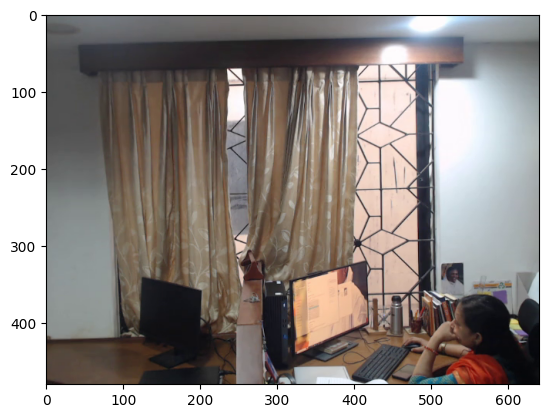

In [104]:
img1 = cv2.imread("img2.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

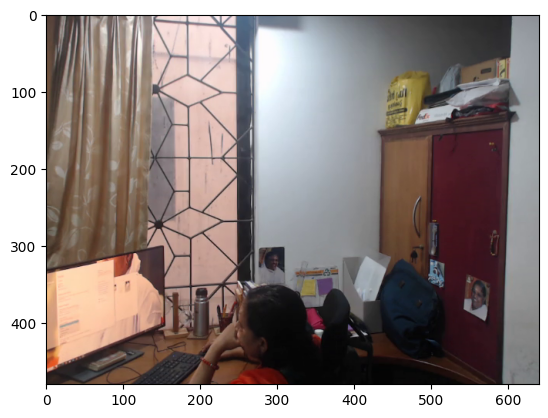

In [105]:
img2 = cv2.imread("img3.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [106]:
orb = cv2.ORB_create()
matcher = cv2.BFMatcher(cv2.NORM_HAMMING)

In [94]:
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

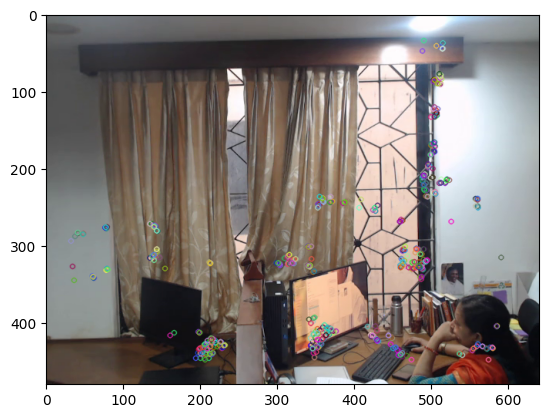

In [107]:
plt.imshow(cv2.drawKeypoints(img1, kp1, None))

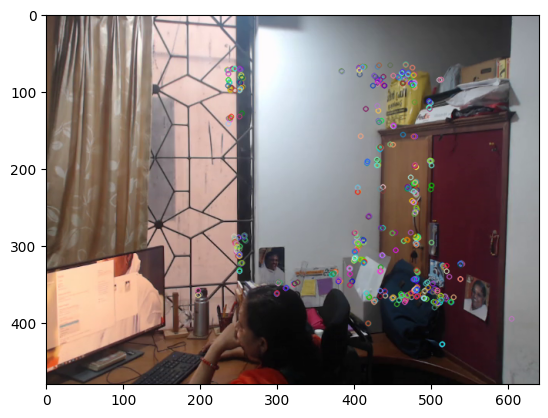

In [108]:
plt.imshow(cv2.drawKeypoints(img2, kp2, None))

In [109]:
rawMatches = matcher.match(des2, des1)

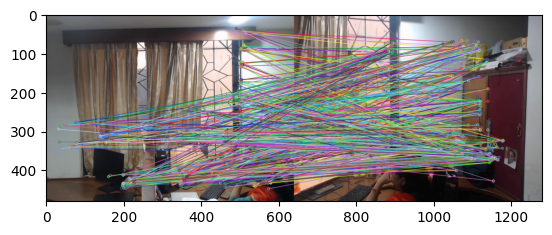

In [110]:
plt.imshow(cv2.drawMatches(img1,kp1, img2, kp2, rawMatches, None))

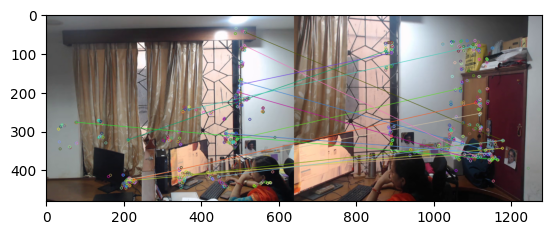

In [111]:
matches = sorted(rawMatches, key=lambda x: x.distance)
distance_threshold = 50.0
good_matches = [match for match in matches if match.distance < distance_threshold]
plt.imshow(cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None))

In [112]:
if len(good_matches) >= 4:
    src_pts = np.float32([kp2[match.queryIdx].pt for match in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp1[match.trainIdx].pt for match in good_matches]).reshape(-1, 1, 2)

    # Calculate the homography matrix
    homography_matrix, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
print(homography_matrix) 

[[-2.40001499e-01 -2.56750156e+00  3.03510202e+02]
 [-5.25094246e-01 -4.33350311e-01  1.71500463e+02]
 [-2.05396806e-03 -5.11055899e-03  1.00000000e+00]]


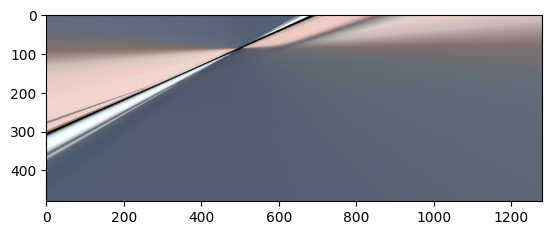

In [114]:
img2Transformed = cv2.warpPerspective(img2 , homography_matrix, (img2.shape[1] + img1.shape[1], img2.shape[0]))
img2Transformed.astype(np.uint8)
plt.imshow(img2Transformed)

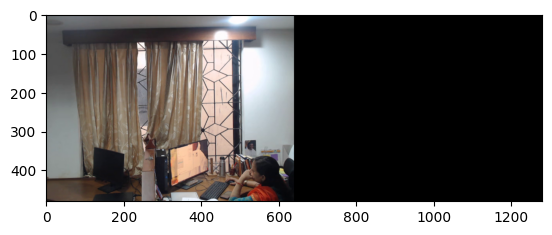

In [115]:
LeftPanorama = np.zeros([img2Transformed.shape[0]  , img2Transformed.shape[1] , 3] , np.uint8)
LeftPanorama[:img1.shape[0],:img1.shape[1]] = img1
plt.imshow(LeftPanorama)

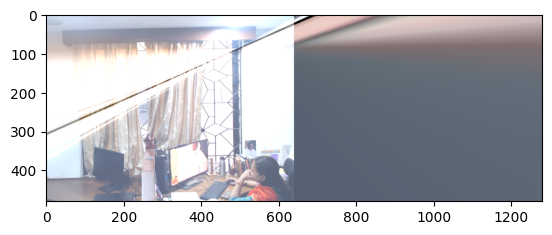

In [116]:
res = cv2.add(LeftPanorama, img2Transformed)
plt.imshow(res)